## DS807: Applied machine learning
Christian M. Dahl. cmd@sam.sdu.dk.

### Convolutional Neural Networks

Notes: For the purpose of this notebook, DLWP refers to Deep Learning with Python by Francois Collet (ISBN10: 9781617294433).

## Program

After this lecture, you will:
1. Know of the fundamentals of convolutional neural networks, including convolutional and pooling layers.
1. Know of the intricacies related to applying certain layers for higher dimensional data.
1. Know how to use data augmentation to improve your models.
1. Know what transfer learning is, how to use it, and the different ways it may be used.
1. Know what spatial transformers are and how they may be used.
1. Have applied all of the above methods to solve problems within computer vision.
1. Be familiar with two classical architectures within computer vision.

## Understanding images

We have already discussed images to some extent, but it's important to understand some important attributes of image data.

1. An image is often represented by a tensor, the dimensions of which are the height, width, and the (color) channels. As such, a greyscale image only has the black/white color channel and can hence be represented as a matrix. A color image typically has three color channels: red, green, and blue (RGB).
1. As such, a 224x224 color image consists of 150,528 features (= $224 * 224 * 3$). This is a huge amount of features, which makes working with images challenging - 224x224 really isn't even a particular large image!
1. However, we can exploit certain properties of images to make the task much easier. For example, many of the interesting things we want to detect in images are independent of *where* in the image we are (such as detecting edges). This allows us to "re-use" transformations a great deal, which will reduce the number of parameters significantly and speed up computation - we then work with small "patches" of the image.

<img src="./graphics/figure_5-1.png" alt="Drawing" style="width: 400px;"/>

Source: "DLWP".

## Finding patterns in images - a "stylized example"

It is not - at least in my opinion - immediately clear how to build an algorithm to classify the content of images. A fundamental challenge is that *the same object can look very different depending on the image of it*. 

For this reason, a typical approach is to find patterns or objects in an image, and then use these to base classification on.

The process starts by finding low level feaures - such as edges - and then gradually build up more and more complex features (such as eyes).

Finally, these are then used to perform classification. For example, if we have identified a catlike eye, nose, and ear, we may predict that the image contains a cat.

In reality, the process is not as clear cut as this example seems to indicate, but it showcases the general idea.

<img src="./graphics/05fig02.jpg" alt="Drawing" style="width: 600px;"/>

Source: "DLWP".

## Filters

Alright, so what do we do with these small "patches" in order to find patterns? We apply filters/maps (which really is just linear or a combination of linear and nonlinear transformations).

These may perform edge detection, blurring, an so forth. Importantly, these transformations - or filters/maps - are *learned* from the data. 

As multiple filters/maps work after each other, they become increasingly complex, allowing for very advanced transformation.

<img src="./graphics/figure_5-3.png" alt="Drawing" style="width: 800px;"/>

Source: "DLWP".

## A typical CNN architecture (MNIST)

<img src="./graphics/1 uAeANQIOQPqWZnnuH-VEyw.jpeg" alt="Drawing" style="width: 1000px;"/>

Source: "DLWP".

## Building blocks of convolutional neural networks

To understand convolutional neural networks (CNNs), we need to become familiar with two new types of layers. The general building blocks of a CNN for classification is:
1. Convolutional layers. These are the main building blocks of CNNs. Must specify the number of **filters/maps/channels**, the **kernel size**, the **strides**, and the **padding method** (if any) when using them. Typically accompanied with a nonlinearity. 
1. Pooling layers. Optional, but often very helpful, layers that assist particularly in learning **translation invariance**. Must specify the **pool size**, the **pooling method**, the **strides**, and the **padding method** (if any) when using them.
1. Finish with a fully connected part.

In practice:
1. Convolutional layers are often used with kernel size of (3, 3), stride 1, and no padding. The number of filters are built gradually through the network (starting from a low number and for example doubling it in each layer). The nonlinearity used is most commonly the ReLU.
1. Pooling layers are often used with pool size (2, 2), stride 2, no padding, and by using *maximum pooling*.

## Understanding convolutional layers

Let us dive into convolutional layers. To demystify the layer, note that ***it is a special case of a fully connected layer***. It is not able to do anything "new" - in fact, it is more restricted!

However, the restriction is done in a smart way: It sacrifices very little capability for a large decrease in number of parameters and computational demands. This also makes it faster and less prone to overfitting.

A convolutional layer can be reconstructed 1:1 by a fully connected layer with appropriate weights. What does appropriate mean here? That most of the weights are zero and the non-zero weights are "shared". If we use a 3x3 kernel, there is only 10 (= 3*3 + 1) parameters in this specific filter!

The "sort of" new thing is the number of filters. To allow for sufficient capability we now use ***multiple filters***. In the initial input (the image) we typically have 1 or 3 channels, which is referred to as the input depth. If we then use perform a convolutional transformation with 32 filters, the output depth of the layer will be 32.

## Convolution in action
<img src="./graphics/2D_Convolution_Animation.gif" alt="Drawing" style="width: 600px;"/>

## Convolution in action
<img src="./graphics/CNN_Map1.jpg" alt="Drawing" style="width: 600px;"/>

## Convolution in action
<img src="./graphics/CNN03.gif" alt="Drawing" style="width: 600px;"/>

Source: "DLWP".

## Convolutions (may) make the image smaller

An important thing to keep in mind when applying convolutions is that their output will be smaller (in height and width) than their input. 

If we start with a 28x28 image and apply a 3x3 kernel, the output will be of size 26x26. We cannot work with the outmost pixels on each side!

If we start with a 28x28 image and apply a 5x5 kernel, the output will be of size 24x24. We cannot work with the two outmost pixels on each side!

Kernels can have any shape$^1$ (of two integers, representing height and width), but they get *much* more expensive as their height and width grow (since the number of parameters in a kernel is the product of its heigh and width plus 1). In practice *small* kernels are used (such as 3x3) - this is fine since we apply multiple of them after each other, which allows them to also model transformations that require larger kernels!

$^1$*Any shape within the constraint of the image size*.

## Padding

Sometimes we don't want the image to decrease in size as we apply convolutions. This is easily solved.

We simply "insert" additional pixels around the image (and give them all values of zero). And otherwise we proceed as normal!

This way, we can retain the size - and could (although it would not make sense) use kernels that are arbitrarely large.

### Illustration

<img src="./graphics/figure_5-6.png" alt="Drawing" style="width: 800px;"/>

Source: "DLWP".

## Stride

So far, our kernels have "walked" one pixel at a time. This is called the strides, and we have used (1, 1) to denote step sizes of 1 in both height and width direction.

The strides may be larger, such as (2, 2). This has a dramatic effect on the number of pixels remaining after the convolution.

For an image of size 30x30 and applying a 3x3 kernel while *not* using padding, the output size will be:
1. For 1x1 strides: 28x28. Drop 1 pixel on each side (due to kernel size and no padding).
1. For 2x2 strides: 14x14. Drop 1 pixel on each side and then using every second pixel as new center since using stepsize of two.
1. For 4x2 strides: 7x14. Drop 1 pixel on each side, using every fourth pixel in height direction and every second pixel in width direction (as new centers).

## Stride in action
<img src="./graphics/1 BNLPHcNxLCgtwlJHnSs9oA.gif" alt="Drawing" style="width: 800px;"/>

Source: "Andrew Ng".

In [1]:
import tensorflow as tf

model_s1x1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), 
                           input_shape=(30, 30, 1))
])
model_s2x2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(2, 2), 
                           input_shape=(30, 30, 1))
])
model_s4x2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(4, 2), 
                           input_shape=(30, 30, 1))
])

model_s1x1.summary()
model_s2x2.summary()
model_s4x2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 1)         10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 14, 14, 1)         10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)  

## Understanding pooling layers

The second new fundamental building block of CNNs is pooling layers. These "pool" a number of pixels into one. This is typically done using either:
1. The average value of the pixels.
1. The maximum value of the pixels. This is the most common method.

**Note**: *There are no trainable parameters in these layers!* 

This imposes *very* strong priors - we tell the network exactly what to do in these layers and do not allow it to learn anything!

It is a very efficient way of downscaling (which is important for computational reasons and also to combat overfitting).

For example, using a pool size of 2x2 and strides of 2x2 (this is the typical way to use pooling), we reduce the image size by half both with respect to the height and width, resulting in only one fourth of the number of pixels.

To determine the size of the output based on the input size, the pool size, and the strides is like with convolutional layers.

Pooling layers in Convolutional Neural Networks (CNNs) are important for several reasons:

1. Dimensionality Reduction: Pooling layers help reduce the spatial dimensions of the input data while retaining the most important information. This reduces the computational complexity of the network and helps manage overfitting by summarizing the features in a smaller representation.

2. Translation Invariance: Pooling layers make the network more robust to small translations and distortions in the input data. By selecting the most relevant features within a local region, pooling helps the network focus on the presence of specific features rather than their exact positions in the input image.

3. Increased Receptive Field: Pooling aggregates information from a local neighborhood in the previous layer, effectively increasing the receptive field of the network. This allows the network to capture more abstract and high-level features as it processes deeper layers.

4. Parameter Reduction: Pooling layers don't have any trainable parameters, which means they don't contribute to the overall number of parameters in the network. This is important for reducing the risk of overfitting, as it doesn't add extra complexity.

5. Computational Efficiency: By reducing the spatial dimensions of the feature maps, pooling layers make the network more computationally efficient. This is particularly important in large-scale applications where training and inference times are crucial.

There are two common types of pooling layers used in CNNs:

1. Max Pooling: Max pooling selects the maximum value from a local region within each feature map. It helps retain the most significant features and is well-suited for tasks where the precise location of the feature is not crucial.

2. Average Pooling: Average pooling calculates the average value of the features within a local region. It provides a smoother representation of the data and can be useful in scenarios where a more generalized understanding of the data is required.

In summary, pooling layers in CNNs are essential for reducing spatial dimensions, increasing network robustness, and managing computational complexity. They play a key role in enabling the network to learn hierarchical and abstract features, making them a fundamental component in many successful deep learning architectures for image and spatial data analysis.

## Max pooling in action
<img src="./graphics/maxpool.gif" alt="Drawing" style="width: 800px;"/>

## The required code

1. To add convolutional layers, use $\texttt{tf.keras.layers.Conv2D}^1$. You must specify the number of filters and the kernel size. The default strides is (1, 1) and no use of padding, both of which are often fine. Handling activations and weight regularization is similar to $\texttt{tf.keras.layers.Dense}$. See https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D.
1. To add maximum pooling layers, use $\texttt{tf.keras.layers.MaxPool2D}^1$. You need not specify anything. The default pool size is (2, 2) and the default strides follows the pool size - both of these are fine. See https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D.

Hence, building a decent CNN is as simple as applying a number of convolutional layers, increasing the number of filters as you go along, using a kernel size of (3, 3) and applying ReLU as the nonlinearity. Further, you may mix in some maximum pooling layers (with all default settings). Finally, you should apply a $\texttt{Flatten}$ layer and then use fully connected layers to create the "head".

$^1$2D since we work with images - there also exist convolutional and pooling layers for 1D or 3D data.

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt

# Load the data
data = tf.keras.datasets.cifar10.load_data()
# Split the data
(train_images, train_labels), (test_images, test_labels) = data
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = train_labels.reshape(-1), test_labels.reshape(-1)
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
    'ship', 'truck'
]


def plot():
    plt.figure(figsize=(8, 8))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i])
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


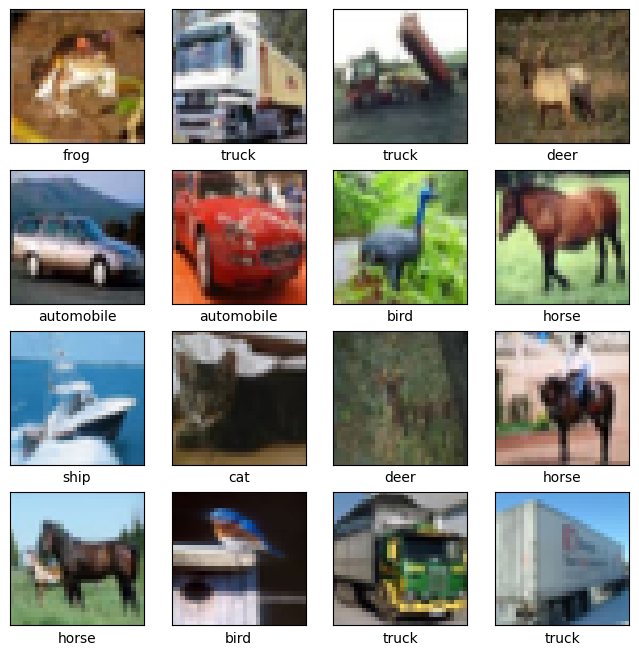

In [14]:
plot()

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                           input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(), # flatten before fully connected part
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )

In [4]:
model.summary()
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), epochs=15, 
                    verbose=0)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

## Incorporating what we learned in previous lecture

We can easily use larger models and apply batch normalization and dropout to CNNs (as well as early stopping and weight regularization, of course!).

For dropout, the normal version can be applied to convolutional layers, but there is a potential problem: adjacent pixels (also in hidden layers) are likely to be very correlated, and so the normal version does not regularize very much (as it might drop a pixel but keep its highly correlated adjacent pixels). To solve this issue, we can drop entire filters instead (see https://www.tensorflow.org/api_docs/python/tf/keras/layers/SpatialDropout2D).

Batch normalization, weight regularization, early stopping, and so forth, can be applied directly.

In [5]:
model_adv = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                           input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(), # batch normalization
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(), # batch normalization
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'), # bigger
    tf.keras.layers.BatchNormalization(), # batch normalization
    tf.keras.layers.SpatialDropout2D(0.2), # dropout, but for filters instead of nodes
    tf.keras.layers.Flatten(), # flatten before fully connected part
    tf.keras.layers.Dense(128, activation='relu'), # bigger
    tf.keras.layers.BatchNormalization(), # batch normalization
    tf.keras.layers.Dropout(0.2), # normal dropout
    tf.keras.layers.Dense(10, activation='softmax'),
    ])

model_adv.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )

In [6]:
model_adv.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                      

In [7]:
history_adv = model_adv.fit(train_images, train_labels, 
                            validation_data=(test_images, test_labels), epochs=15, verbose=0)

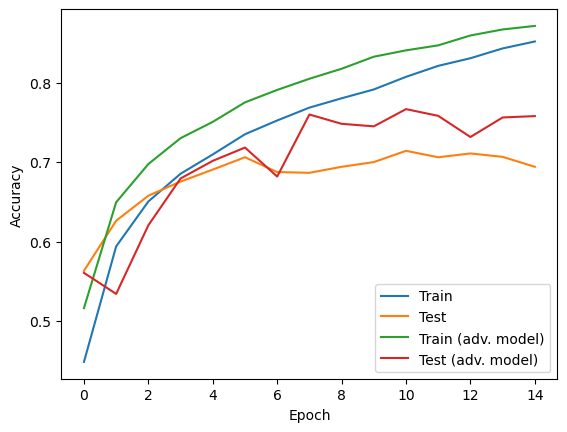

In [8]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.plot(history_adv.history['accuracy'], label = 'Train (adv. model)')
plt.plot(history_adv.history['val_accuracy'], label = 'Test (adv. model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [9]:
model.evaluate(test_images,  test_labels)
model_adv.evaluate(test_images,  test_labels);

313/313 [==============================] - 2s 7ms/step - loss: 0.7627 - accuracy: 0.7579


## Image augmentation

As discussed briefly during our last lecture, a technique to avoid overfitting is data augmentation.

This is essentially a method that allows you to artificially increase the size of your training data by constructing more training data yourself.

In most settings, it is not obvious how to construct further training data automatically, but for images this may be done in several ways, such as by performing flipping, rotation, translation, shearing, constrasting, and so forth.

That is, you change the image in a way so as to retain the label (i.e. the content of the image).

This technique is crucial for obtaining the best models in computer vision, in particular for small datasets.

<img src="./graphics/05fig11.jpg" alt="Drawing" style="width: 600px;"/>

Source: "DLWP".

## Using image augmentation

You can think of data augmentation as a regularization technique, with the usual caveats in mind.

That is, when you use it you may train a larger model and train for longer.

Further, the steps above - building larger models and training for longer - are also often crucial to benefit from it. The performance of a small model may degrade from its use, especially if you use "strong" augmentation.

Data augmentation should - in most cases - only be used on the training data!

## Image augmentation in TensorFlow

There are many ways to apply image augmentation. You can come up with your own transformations and apply them directly to the data before training. This, however, is very cumbersome, especially as you want to produce many versions of each image.

A much better way is generate the augmented images on the fly. This may be done by a $\texttt{tf.keras.Sequential}$ model. The "layers" are then the transformations requested; for a full list see https://www.tensorflow.org/api_docs/python/tf/keras/layers

This model may then be used in two ways - either *directly* in your model or when preparing the data

Using it directly as part of your model is very convenient, as it is kept between saving and loading your model and automatically turned appropriately on/off as you are training/testing. 

In [10]:
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR) # Ignore the warning messages...small bug in tf 2.10

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1,input_shape=(32,32,3)),
    tf.keras.layers.RandomFlip("horizontal"),
])

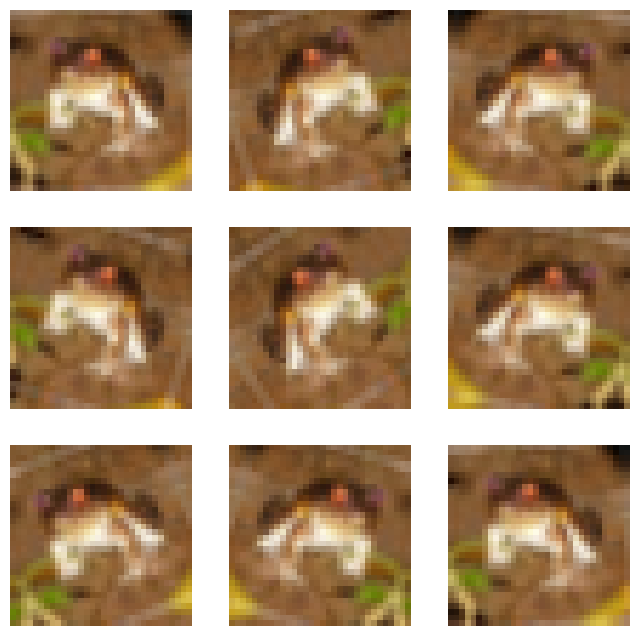

In [59]:
sample_image = train_images[0:1].copy()
plt.figure(figsize=(8, 8))
for i in range(9):
    augim = data_augmentation(sample_image, training=True)[0] # Stress training=True
    ax = plt.subplot(3, 3, i + 1); plt.axis('off'); plt.imshow(augim)       

In [12]:
model_da = tf.keras.models.Sequential([
    data_augmentation, # only new part!
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                           input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(), # flatten before fully connected part
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])
model_da.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )

In [13]:
model_da.summary()
history_da = model_da.fit(train_images, train_labels, 
                          validation_data=(test_images, test_labels), 
                          epochs=15, verbose=0)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)         

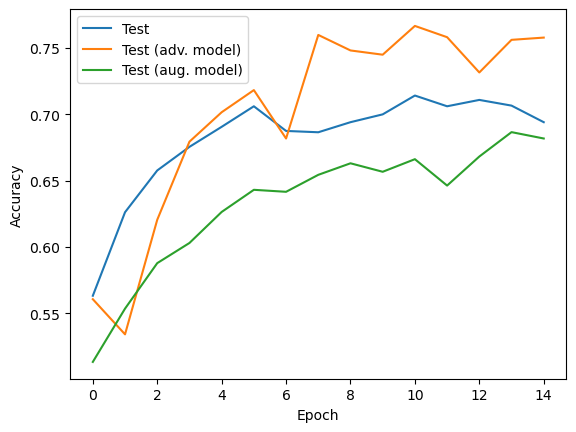

In [14]:
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.plot(history_adv.history['val_accuracy'], label = 'Test (adv. model)')
plt.plot(history_da.history['val_accuracy'], label = 'Test (aug. model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [15]:
model.evaluate(test_images,  test_labels)
model_adv.evaluate(test_images,  test_labels)
model_da.evaluate(test_images,  test_labels);

313/313 [==============================] - 1s 4ms/step - loss: 0.9276 - accuracy: 0.6818


## Exercise

1. Use the CIFAR-10 data (pronounced as "sifar-10"). Build a CNN with no more than 50,000 parameters (**hint**: think carefully on how to use pooling to downscale and on the number of filters of convolutional layers). A model of this size should still be able to perform quite well on the CIFAR-10 data. You may want to explore even smaller models.
1. Build a model using 10 convolutional layers with kernel size (5, 5) (**hint**: proper use of padding is crucial to make this possible). 
1. Attempt to improve the performance of your models by using image augmentation. Consider which types of augmentations make sense to use. Recall how you may want to use a larger model and/or train for longer now that you use augmentation.
1. Try to use what we learned during our last lecture (on regularization and optimization) to improve your model.

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point (exercise-cnn.ipynb). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

## Transfer learning

One of the most crucial aspects of neural networks, in particular in the fields of computer vision and natural language processing, is their ability to transfer from one task to another - even if these are not directly related.

In computer vision, it is common practice to take a pre-traied model trained on a large dataset, such as ImageNet, and use it as the base of your own model. This is particularly useful when your own dataset is small.

Transfer learning is often a "win-win" tool - you end up with a better model and training is faster (since you often do not need to train for as long, since many of the things are already "learned").

ImageNet is a dataset with 1000 classes, containing content such as types of dogs or cats, but even if your own task is quite different, it still serves as a good starting point for the weights of your network.

I suggest heavily to carefully read and try to run and tune the TensorFlow tutorial on transfer learning https://www.tensorflow.org/tutorials/images/transfer_learning.

See also [Hugging Face](https://huggingface.co/) model and dataset repository

## Two main types of transfer learning

Recall how a CNN consists of a feature extraction part and a classifier. The classifier is called the head.

1. **Feature extraction**: Here, you cut off the head of the CNN you transfer from. You then send all your images through this network and save the transformed features. You then proceed as normal on these new features (that are likely to be better than the raw images). **Strenght**: *Very* fast and does not require a lot of computational to use. Relatively easy to use.
1. **Fine tuning**: Here, you cut off the head and *replace* it with a new head (to be used on your own data). You then train both the new head and to some smaller extent the base your transfer from (maybe a part of it, maybe all but with a low learning rate). **Strength**: Often achieves the best performance possible, at the cost of more training time and some more difficulties in their usage.

<img src="./graphics/figure_5-14.png" alt="Drawing" style="width: 1000px;"/>

Source: "DLWP".

<img src="./graphics/05fig19.jpg" alt="Drawing" style="width: 150px;"/>

Source: "DLWP".

## Transfer learning in practice

**Note**: These examples are illustrative - MobileNet is not made for so small (32x32) images.

However, it does work for images of that size decently.

Further, please note that MobileNet was trained on images scaled to lie within [-1 , 1] and we currently scale our images to lie withing [0, 1]. Note how this is fixed in the $\texttt{.predict()}, \texttt{.fit()}$ calls.

Finally, we will use the version trained on 224 X 224 images (default). I recommend you also trying the version trained on 96 x 96 images...maybe that is better (why)?

## Transfer learning in practice

Four examples

- Pure feature extraction from pre-trained model(single pass)
- Feature extraction from pre-trained model with multiple passes
- Pre-trained model as an additional layer with all parameters in that layer treated as trainable
- Pre-trained model as an additional layer but with a subset of trainable parameters (fine-tuning) 


## Transfer learning in practice - pure feature extraction

We start by performing pure feature extraction, where we generate new features using a pre-trained model and then train a neural network on these new features.

This is extremely fast, as you only need to pass your data once through the pre-trained model and otherwise train a very small model. However, it tends to lead to the worst performance of the methods of transfer learning available.  

In [16]:
base_model = tf.keras.applications.MobileNetV2(
    #input_shape=(96, 96, 3), # refers to the shape we transfer from
    include_top=False, # cut off the head
    weights='imagenet', # pretrained on the ImageNet data
)
base_model.trainable = False # freeze the base model to not train it 
                             # not needed for pure feature extraction,
                             # but needed for the feature extraction 
                             # with multiple passes (as it is implemented here)

# Create new features
z_train = base_model.predict(2 * train_images - 1) # Note the rescaling
z_test = base_model.predict(2 * test_images - 1) # Note the rescaling

313/313 [==============================] - 5s 15ms/step


In [17]:
model_pfe = tf.keras.models.Sequential([
    # flatten before fully connected part
    tf.keras.layers.Flatten(input_shape=(1, 1, 1280)), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])
model_pfe.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )
model_pfe.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                81984     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 82,634
Trainable params: 82,634
Non-trainable params: 0
_________________________________________________________________


In [18]:
history_pfe = model_pfe.fit(z_train, train_labels, 
                            validation_data=(z_test, test_labels), 
                            epochs=15, verbose=0)

## Transfer learning in practice - feature extraction with multiple passes

We next perform  feature extraction where we for each batch pass the data through the network we transfer from.

This is needed if we want to use data augmentation, for example.

However, often data augmentation isn't as important in these cases as in many other, as our model is very small (and hence not very prone to overfit) - although this depends also on how large a model we insert after out pre-trained part.

This is still relatively fast, but slower than the approach above (at least if we train for more than one epoch), as we need to pass data through the larger pre-trained model multiple times.

In [19]:
model_fe = tf.keras.models.Sequential([
    data_augmentation, # can still use data augmentation now
    base_model, # the pre-trained part
    tf.keras.layers.Flatten(), # flatten before fully connected part
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])
model_fe.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )
model_fe.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                81984     
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,340,618
Trainable params: 82,634
Non-trainable params: 2,257,984
_______________________________________

In [20]:
history_fe = model_fe.fit(2 * train_images - 1, train_labels,
                          validation_data=(2 * test_images - 1, test_labels),
                          epochs=15, verbose=0)

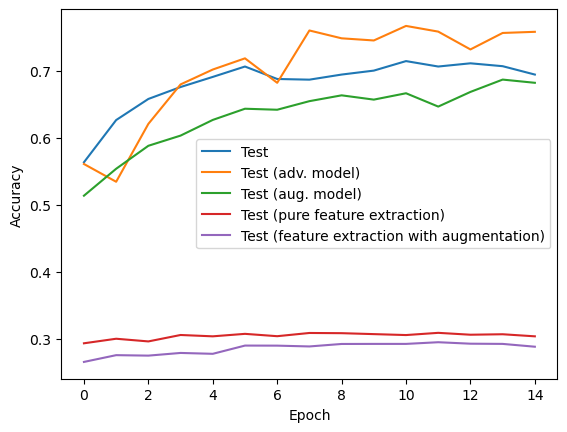

In [60]:
plt.plot(history.history['val_accuracy'], 
         label = 'Test')
plt.plot(history_adv.history['val_accuracy'], 
         label = 'Test (adv. model)')
plt.plot(history_da.history['val_accuracy'], 
         label = 'Test (aug. model)')
plt.plot(history_pfe.history['val_accuracy'], 
         label = 'Test (pure feature extraction)')
plt.plot(history_fe.history['val_accuracy'], 
         label = 'Test (feature extraction with augmentation)')
plt.xlabel('Epoch');plt.ylabel('Accuracy');plt.legend()

## Transfer learning in practice - using it as any other layer

A very simple way of using a pre-trained model is to pretend that it is just a layer like any other.

Then, it may be seen as a fancy way of performing weight initialization.

This method is in many texts not very discussed or even discouraged. But in some cases it still works quite well, we the following example shows.

This method is the one most prone to problems with overfitting of the methods presented in these slides for transfer learning, and may not be appropriate for small datasets.

It is also the slowest method, as it trains *everything*.

In [22]:
model_weight_init = tf.keras.models.Sequential([
    data_augmentation,            # can still use data augmentation now
    tf.keras.applications.MobileNetV2(
        #input_shape=(96, 96, 3), # refers to the shape we transfer from
        include_top=False,        # cut off the head
        weights='imagenet',       # pretrained on the ImageNet data
    ),                            # the pre-trained part
    tf.keras.layers.Flatten(),    # flatten before fully connected part
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])
model_weight_init.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # often a good idea 
                                                   # to use a lower learning rate 
                                                   #(default=0.001)
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )

In [23]:
model_weight_init.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 1280)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                81984     
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 2,340,618
Trainable params: 2,306,506
Non-trainable params: 34,112
_______________________________________

In [24]:
history_weight_init = model_weight_init.fit(2 * train_images - 1, train_labels,
                      validation_data=(2 * test_images - 1, test_labels), 
                      epochs=15, verbose=0)

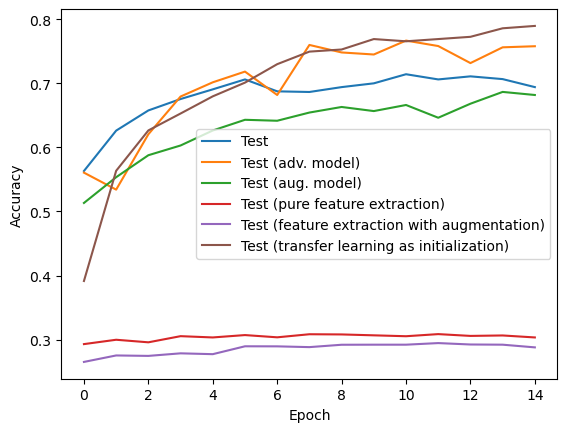

In [61]:
plt.plot(history.history['val_accuracy'], 
         label = 'Test')
plt.plot(history_adv.history['val_accuracy'], 
         label = 'Test (adv. model)')
plt.plot(history_da.history['val_accuracy'], 
         label = 'Test (aug. model)')
plt.plot(history_pfe.history['val_accuracy'], 
         label = 'Test (pure feature extraction)')
plt.plot(history_fe.history['val_accuracy'], 
         label = 'Test (feature extraction with augmentation)')
plt.plot(history_weight_init.history['val_accuracy'], 
         label = 'Test (transfer learning as initialization)')
plt.xlabel('Epoch');plt.ylabel('Accuracy');plt.legend()

## Transfer learning in practice - finetuning

The "middle ground" between feature extraction and simply using the pre-trained weights as an initialization method.

Often a good middle ground, in that it helps avoid overfitting and further is faster than the initialization method (since fewer layers are often trained - sometimes all layers are trained, in which case it need not be faster).

Particularly useful then you have limited training data and want to squeeze as much as possible out of your model.

In [ ]:
head_ft = tf.keras.models.clone_model(model_pfe)
head_ft.set_weights(model_pfe.get_weights())

base_model_ft = tf.keras.applications.mobilenet_v2.MobileNetV2(
    #input_shape= (96, 96, 3), # refers to the shape we transfer from...
    include_top=False,       # cut off the head
    weights='imagenet',      # pretrained on the ImageNet data
)
base_model_ft.training = False # to disable updating of means and 
                               # variances in batch norm layers
                               # This is in some cases very important, 
                               # but in this case it would still 
                               # work fine if we did not do it

for layer in base_model_ft.layers[:100]: # layers after number 100 
    layer.trainable = False              #in base_model now trainable
    
model_ft = tf.keras.models.Sequential([
    data_augmentation, # can still use data augmentation now
    base_model_ft, # the pre-trained part
    head_ft, # the classifer we trained using feature extraction
])

model_ft.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0001), # use a low learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )

In [27]:
model_ft.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 sequential_7 (Sequential)   (None, 10)                82634     
                                                                 
Total params: 2,340,618
Trainable params: 1,944,074
Non-trainable params: 396,544
_________________________________________________________________


In [28]:
history_ft = model_ft.fit(2 * train_images - 1, train_labels, 
                          validation_data=(2 * test_images - 1, test_labels), 
                          epochs=15, verbose=0)

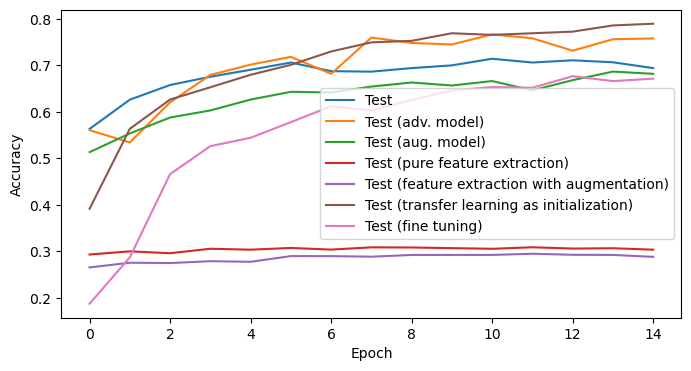

In [66]:
plt.figure(figsize=(8, 4));
plt.plot(history.history['val_accuracy'], 
         label = 'Test')
plt.plot(history_adv.history['val_accuracy'], 
         label = 'Test (adv. model)')
plt.plot(history_da.history['val_accuracy'], 
         label = 'Test (aug. model)')
plt.plot(history_pfe.history['val_accuracy'], 
         label = 'Test (pure feature extraction)')
plt.plot(history_fe.history['val_accuracy'], 
         label = 'Test (feature extraction with augmentation)')
plt.plot(history_weight_init.history['val_accuracy'], 
         label = 'Test (transfer learning as initialization)')
plt.plot(history_ft.history['val_accuracy'], 
         label = 'Test (fine tuning)')
plt.xlabel('Epoch');plt.ylabel('Accuracy');plt.legend()

## Understanding what is going on in convolutional layers

Neural networks are often presented as "black boxes", where it is impossible to explain what is going in within the layers.

In truth, this is a weakness of neural networks, but we can dive into the layers to get some understanding.

There are a few ways of doing this for CNNs, including:
1. Visualize the activations of intermediate layers.
1. Generate images that maximally "excite" certain parts of the network.
1. Generate heatmaps of activations over the input image.

Aside from the book, I draw from https://www.sicara.ai/blog/2019-08-28-interpretability-deep-learning-tensorflow and https://www.pyimagesearch.com/2020/03/09/grad-cam-visualize-class-activation-maps-with-keras-tensorflow-and-deep-learning/, which both use recent TensorFlow versions to solve these problems.

## Example image

<img src="./graphics/05fig24.jpg" alt="Drawing" style="width: 400px;"/>

Source: "DLWP".

## One activation of first layer

<img src="./graphics/05fig25.jpg" alt="Drawing" style="width: 400px;"/>

Source: "DLWP".

## Another activation of first layer

<img src="./graphics/05fig26.jpg" alt="Drawing" style="width: 400px;"/>

Source: "DLWP".

## All activations of all layers

<img src="./graphics/05fig27_alt.jpg" alt="Drawing" style="width: 350px;"/>

Source: "DLWP".

## Let's try on our own data...

... using the first image and our most simple network.

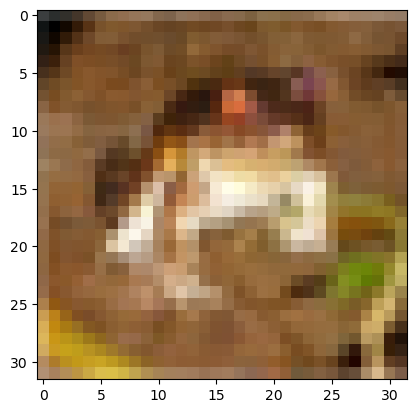

In [30]:
example_image = train_images[0:1].copy()
plt.imshow(example_image[0])

In [68]:
model.summary() # note the names!

Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_20 (Conv2D)             (None, 28, 28, 32)   2432        ['input_6[0][0]']                
                                                                                                  
 conv2d_21 (Conv2D)             (None, 28, 28, 32)   9248        ['conv2d_20[0][0]']              
                                                                                                  
 skip_layer_0 (Add)             (None, 28, 28, 32)   0           ['conv2d_20[0][0]',              
                                                                  'conv2d_21[0][0]']       

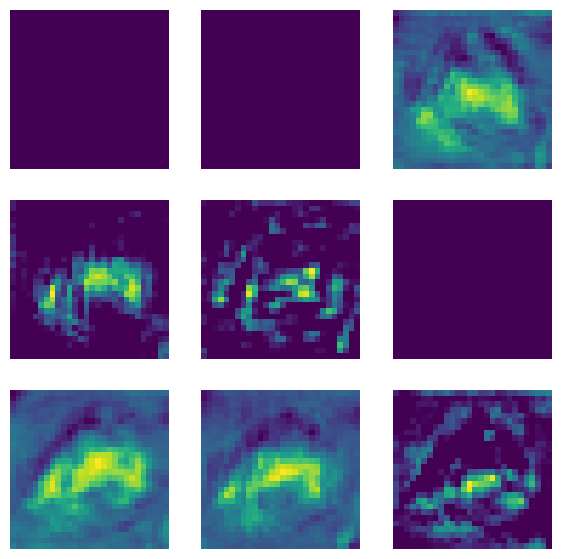

In [69]:
plt.figure(figsize=(7, 7))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1); 
    plt.axis('off'); 
    plt.imshow(model.get_layer('conv2d_20')(example_image)[0, :, :, i])

## Visualizing filters

Another way to gauge at understanding is to visualize what type of input maximally excites specific layers.

This allows us to see what the different layers/filters respond to - essentially what type of "objects" they look for.

## The "polka dot" layer - maybe looking for eyes?

<img src="./graphics/figure_5-29.png" alt="Drawing" style="width: 400px;"/>

Source: "DLWP".

## Block 1 - very coarse

<img src="./graphics/figure_5-30.png" alt="Drawing" style="width: 400px;"/>

Source: "DLWP".

## Block 2 - more fine

<img src="./graphics/figure_5-31.png" alt="Drawing" style="width: 400px;"/>

Source: "DLWP".

## Block 3 - very detailed/fine patterns

<img src="./graphics/figure_5-32.png" alt="Drawing" style="width: 400px;"/>

Source: "DLWP".

## Block 4 - even finer patterns

<img src="./graphics/figure_5-33.png" alt="Drawing" style="width: 400px;"/>

Source: "DLWP".

## Let's try on our own data...

... using the first image and our most simple network.

In [3]:
def tidy_image(image):
    image = image.numpy()[0]
    image -= image.mean()
    image /= (image.std() + 0.00001)
    image *= 0.1
    image += 0.5
    image = np.clip(image, 0, 1)
        
    return image

In [6]:
import numpy as np

def generate_pattern(layer_name, filter_index, im_size):
    # Build a model that given an input image returns the activation
    # of the target layer
    submodel = tf.keras.models.Model([model.inputs], 
                                     [model.get_layer(layer_name).output])

    # Create a "blank" input image (initialization)
    input_img_data = np.random.random((1, *im_size))
    input_img_data = tf.Variable(tf.cast(input_img_data, tf.float32))

    # Iterate gradient ascents
    # Within the context of tf.GradientTape, which records operations 
    # for automatic differentiation, the submodel predicts the activations 
    # given the current state of input_img_data. 
    #The loss is defined as the mean activation of the filter at filter_index.
    for _ in range(100):
        with tf.GradientTape() as tape:
            outputs = submodel(input_img_data)
            loss_value = tf.reduce_mean(outputs[:, :, :, filter_index])
        grads = tape.gradient(loss_value, input_img_data)
        normalized_grads = tf.math.l2_normalize(grads)
        # The normalized gradients are used to update the input image. 
        # The assign_add function updates the value of the variable 
        # by adding the gradients to it, effectively performing a 
        # step of gradient ascent. assign_add means "maximization"
        input_img_data.assign_add(normalized_grads * 1.0) 
        
    return tidy_image(input_img_data)

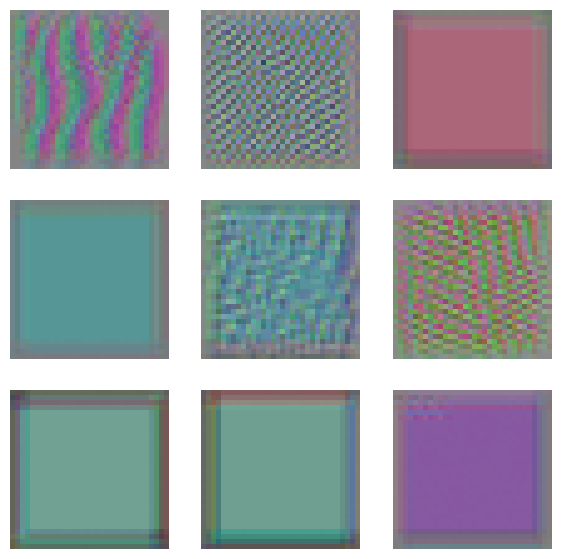

In [71]:
plt.figure(figsize=(7, 7))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1); plt.axis('off'); 
    plt.imshow(generate_pattern('conv2d_20', i, (32, 32, 3)))

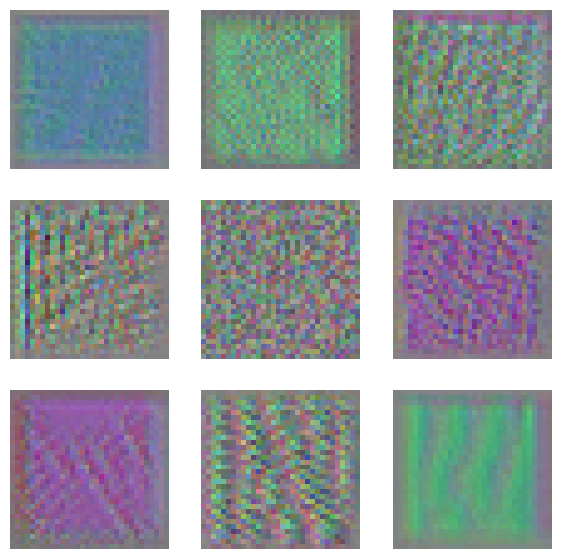

In [72]:
plt.figure(figsize=(7, 7))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1); plt.axis('off'); 
    plt.imshow(generate_pattern('conv2d_21', i, (32, 32, 3)))

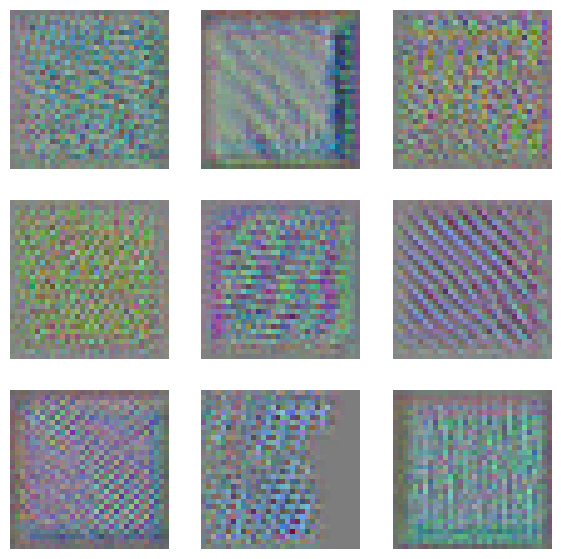

In [74]:
plt.figure(figsize=(7, 7))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1); plt.axis('off'); 
    plt.imshow(generate_pattern('conv2d_22', i, (32, 32, 3)))

## Changing the content of an image - adversarial attacks

We can even go slightly "crazy" - probably more than what good is. But let's do it anyway.

Let's try to purposely change our frog to to some other category.

Now, this very simple implementation is not very convincing, but you may be interested to read up on "adversarial attacks",
which is a way to change the contents of an image in such a way that a human cannot see a difference but a neural network is convinced something else is present in the image.

What I show below is the fundamentals of these attacks.

Consider carefully how this may be used to cause great harms in relation to self-driving cars, for example - this is something that carmakers must consider!

In [40]:
def transform_image(category, steps, start_image):
    submodel = tf.keras.models.Model([model.inputs], [model.get_layer('dense_7').output])

    input_img_data = start_image.copy()
    input_img_data = tf.Variable(tf.cast(input_img_data, tf.float32))

    # Iterate gradient ascents
    for _ in range(steps):
        with tf.GradientTape() as tape:
            outputs = submodel(input_img_data)
            loss_value = tf.reduce_mean(outputs[:, category])
        grads = tape.gradient(loss_value, input_img_data)
        normalized_grads = grads / (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)
        input_img_data.assign_add(normalized_grads * 1.0)
    
    yhat = np.argmax(model.predict(input_img_data.numpy()))
    
    return tidy_image(input_img_data), yhat

In [41]:
def plot(category):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        out, yhat = transform_image(category, i * 3, example_image)
        out = out.reshape(1, *out.shape)
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(out[0])
        plt.xlabel(class_names[yhat])
    plt.show()

In [ ]:
plot(0) # 0 is airplane

In [ ]:
plot(1) # 1 is automobile

In [ ]:
plot(3) # 3 is cat

## Heatmaps of class activations

We may be interested in knowing which parts of an image our CNN focuses on when making its predictions. 

To do this, we can use a technique called "class activation map" visualizations (CAM). 

This is essentially a way to measure how much a specific part of an image corresponds to a given class (such as an African elaphant, which is the example from a book).

## The image

<img src="./graphics/figure_5-34.png" alt="Drawing" style="width: 600px;"/>

Source: "DLWP".

## The heatmap

<img src="./graphics/figure_5-35.png" alt="Drawing" style="width: 400px;"/>

Source: "DLWP".

## Upsizing the heatmap and overlaying on the image

<img src="./graphics/figure_5-36.png" alt="Drawing" style="width: 600px;"/>

Source: "DLWP".

## The grad-CAM approach:

Grad-CAM uses the feature maps produced by the last convolutional layer of a CNN. The authors of Grad-CAM argue, “we can expect the last convolutional layers to have the best compromise between high-level semantics and detailed spatial information.”

## The grad-CAM approach: Step 1
<img src="./graphics/sketch-step1.png" alt="Drawing" style="width: 600px;"/>

Source: https://glassboxmedicine.com/2020/05/29/grad-cam-visual-explanations-from-deep-networks/

## The grad-CAM approach: Step 2
<img src="./graphics/sketch-step2.png" alt="Drawing" style="width: 600px;"/>

Source: https://glassboxmedicine.com/2020/05/29/grad-cam-visual-explanations-from-deep-networks/

## The grad-CAM approach: Step 3
<img src="./graphics/sketch-step3.png" alt="Drawing" style="width: 600px;"/>

Source: https://glassboxmedicine.com/2020/05/29/grad-cam-visual-explanations-from-deep-networks/

## Let's try on our own data...

... using the first three training images and their labels.

This code is quite different from that in the book - this is due to the newer TensorFlow version and not using the OpenCV library but rather PIL.

In [86]:
def get_heatmap(category, start_image):
    frog_output     = model.get_layer('dense_21').output # output layer
    last_conv_layer = model.get_layer('conv2d_22').output # last convnet
    submodel = tf.keras.models.Model([model.inputs], 
                                     [frog_output, last_conv_layer])

    input_img_data = start_image.copy()
    input_img_data = tf.Variable(tf.cast(input_img_data, tf.float32))

    with tf.GradientTape() as tape:
        outputs_class, outputs_conv = submodel(input_img_data)
        loss_value = tf.reduce_mean(outputs_class[:, category])

    grads = tape.gradient(loss_value, outputs_conv)
    
    # This section implements Guided Backpropagation. 
    # It involves element-wise multiplication of three terms: 
    # the indication function that outputs_conv is positive, 
    # the indication function that grads is positive, 
    # and the actual value of grads. 
    # This zeroes out gradients where either the gradient 
    # or the activation is not positive, focusing on the 
    # features that have a positive influence on the target class.
    cast_outputs_conv = tf.cast(outputs_conv > 0, "float32")
    cast_grads        = tf.cast(grads > 0, "float32")
    guided_grads      = cast_outputs_conv * cast_grads * grads
    
    outputs_conv      = outputs_conv[0]
    guided_grads      = guided_grads[0]
    
    # The gradients are averaged across the width and height
    # of the input image to obtain a weight for each filter 
    # in the last convolutional layer.
    weights           = tf.reduce_mean(guided_grads, axis=(0, 1))
    
    # The CAM is computed by performing a weighted sum of the last 
    # convolutional layer's activations, using the weights derived 
    # from the guided gradients.
    cam               = tf.reduce_sum(tf.multiply(weights, outputs_conv), 
                                      axis=-1)
    
    return cam

In [89]:
from PIL import Image
cmap = plt.get_cmap('jet')

def create_heatmap(idx):
    category, image = train_labels[idx], train_images[idx:(idx + 1)]

    heatmap = get_heatmap(category, image)
    heatmap = heatmap.numpy()
    heatmap = Image.fromarray(heatmap)
    #heatmap = heatmap.resize((32, 32), Image.ANTIALIAS)#
    heatmap = heatmap.resize((32, 32), Image.LANCZOS) 
    heatmap = np.array(heatmap) # back to numpy array
    heatmap = (heatmap / heatmap.max()) # to [0, 1]    
    heatmap = cmap(heatmap)
    heatmap = np.delete(heatmap, 3, 2)

    overlayed_heatmap = 0.6 * image[0] + 0.4 * heatmap
    
    return image[0], heatmap, overlayed_heatmap

def plot_heatmap():
    plt.figure(figsize=(7, 7))
    for i in range(3):
        images = create_heatmap(i)
        for j in range(3):
            ax = plt.subplot(3, 3, i * 3 + 1 + j); plt.axis('off'); plt.imshow(images[j])
    plt.show()

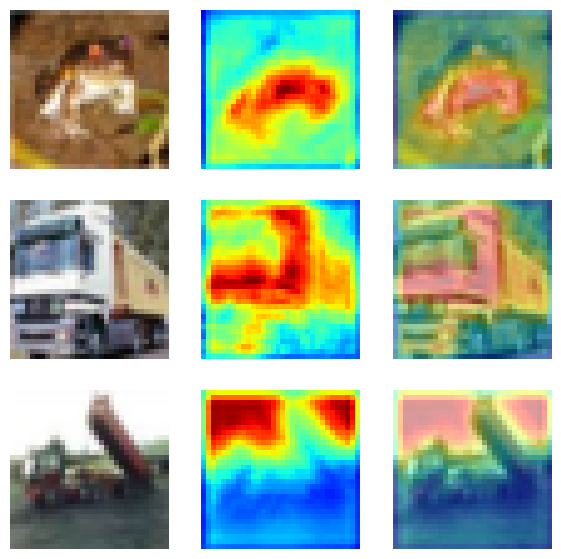

In [90]:
plot_heatmap()

## Final comment on heatmaps

An interesteting properpy of these class activation map visualization is that they allow you to visualize which parts of an image resembles *another* class than the one truly present in the image.

Whether this is useful is up for debate - but it may allow one to look into *why* a CNN make specific mistakes, by investigating which parts of an image "tricks" it.

## Exercise 

1. Use the CIFAR-10 data. Use a pre-model to extract features (i.e. "cut off" its head and then predict on the images to obtain new features). Train a neural network on these extracted features. Is it better than the model you trained last week on CIFAR-10?
2. Combine the base of the model you extracted features with and the new model you just trained. Combine them into one model and perform fine-tuning. Remember to use a low learning rate. How well does the combined model perform?
3. Perform more selective fine-tuning, i.e. only fine-tune *some* layers. Which works best - fine-tuning all layers or only some?
4. Try to understand what is happening in your model by visualizing some of the activations of your model. Further, try to visualize filters - both at the start of your model and further in your model.
5. (Bonus): Find the images your model misclassify (i.e. perform wrong predictions). For some of these, use class activation maps to investigate which parts of the image fools your network.

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point (exercise-transfer-learning.ipynb). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

## Spatial transformer networks

Often, an image is easier to work with if we appropriately zoom in on the relevant part, rotate it in some fashion, and so forth.

However, the exact way this *preprocessing* should be implemented is not trivial, as it is likely to vary significantly between images and the transformation we humans perceive as optimal may not be optimal for a neural network.

These are the problems **spatial transformer networks** aim to solve. The idea: have the neural network start by performing these transformations in a way it learns from the data as part of its layers.

Spatial transformer networks are also a great addition to understanding what is going on within CNNs.

This section is based on "Jaderberg, M., Simonyan, K., Zisserman, A. and Kavukcuoglu, K. Spatial Transformer Networks. Advances in neural information processing systems. 2015. p. 2017-2025", https://github.com/oarriaga/STN.keras, and https://pytorch.org/tutorials/intermediate/spatial_transformer_tutorial.html, although it does not resemble either directly.

## The fundamental goal

<img src="./graphics/stn.gif" alt="Drawing" style="width: 1000px;"/>


<span style="font-size:14px">
Source: "Jaderberg, M., Simonyan, K., Zisserman, A. and Kavukcuoglu, K. Spatial Transformer Networks. Advances in neural information processing systems. 2015. p. 2017-2025".
</span>

## How does it work?

Normally, a convolutional neural network for classification starts with a convolutional part (the feature extractor) and then ends in a fully connected part (the classifier).

A spatial transformer network introduced an additional step: 
- *before* performing feature extraction, use a *localization network* to estimate the best transformation to apply to the image. This is directly a part of the neural network (i.e. the parts are **not** split into different neural networks).

## How does it work?

As such, the forward pass of the network is now:
1. Estimate the best transformation (this is typically also done using a CNN with a fully connected regressor at its end).
1. Transform the image using the estimated transformation above.
1. Proceed in the normal way with a CNN on the transformed image.

This is potentially useful to solve problems such as translation invariance, and to downscale images significantly before passing the image to an expensive CNN.

***If*** it is possible to use a relatively inexpensive localization network to meaningfully scale down the image size before using an expensive CNN, spatial transformer blocks can in fact speed up training and inference significantly.

## Architecture of a spatial transformer network

<img src="./graphics/SpatialTransformerIllustrationExtended.png" alt="Drawing" style="width: 1000px;"/>


<span style="font-size:14px">
Source: "Jaderberg, M., Simonyan, K., Zisserman, A. and Kavukcuoglu, K. Spatial Transformer Networks. Advances in neural information processing systems. 2015. p. 2017-2025".
</span>

## Understanding the transformation and grid generator part

The only truly new part is how we perform the transformation to the input image before using the final CNN. The first CNN, the localization network, is just another CNN.

The localization network predicts the parameters, $\theta$, of the transformation. This can in principle take many forms, but we will focus on the case of an affine transformation, in which case $\theta$ is 6-dimensional (such that the localization network has 6 output nodes).

General 2D affine transform: $ T_{\theta} = 
\begin{bmatrix}
\theta_{11} & \theta_{12} & \theta_{13} \\
\theta_{21} & \theta_{22} & \theta_{23}
\end{bmatrix}
$

Identity transform: $
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0
\end{bmatrix}
$

## Various transformations

<img src="./graphics/transformations.png" alt="Drawing" style="height: 600px;"/>


## The identity transformation and a more useful transformation

<img src="./graphics/stn3.png" alt="Drawing" style="width: 1000px;"/>


<span style="font-size:14px">
Source: "Jaderberg, M., Simonyan, K., Zisserman, A. and Kavukcuoglu, K. Spatial Transformer Networks. Advances in neural information processing systems. 2015. p. 2017-2025".
</span>

## Understanding the bilinear interpolation part

When an image undergoes an affine transformation the pixels in the image get moved around. This can be especially problematic when a pixel location in the output does not map directly to one in the input image.

In the illustration below, you can clearly see that the rotation places some points at locations that are not centered in the squares. This means that they would not have a corresponding pixel value in the original image.

<img src="./graphics/stickman.png" alt="Drawing" style="width: 1000px;"/>



## Understanding the bilinear interpolation part

So for example, suppose that after rotating an image, we need to find the pixel value at the location (6.7, 3.2). The problem with this is that there is no such thing as fractional pixel locations.

To solve this problem, bilinear interpolation (basically) uses the 4 nearest pixel values which are located in diagonal directions from a given location in order to find the appropriate values of that pixel. The result is smoother and more realistic images!

<img src="./graphics/interpolation.jpg" alt="Drawing" style="width: 1000px;"/>

## Individual transformation for two channels

<img src="./graphics/stn5.png" alt="Drawing" style="width: 1200px;"/>

<span style="font-size:14px">
Source: "Jaderberg, M., Simonyan, K., Zisserman, A. and Kavukcuoglu, K. Spatial Transformer Networks. Advances in neural information processing systems. 2015. p. 2017-2025".
</span>


## Advanced priors

We may have some idea on a better prior than, say, the identity transformation.

For example, we may be working with images where a great deal is of no importance and we want to "zoom in" (scaling). This prior may be simply implemented as below.

"Zoom" transform: $
\begin{bmatrix}
s & 0 & 0 \\
0 & s & 0
\end{bmatrix}
$

Here, letting $s = 1$ gives the identity transform, and letting $s = 0.5$ zooms in, effectively cropping out the center, dropping 25% of the top, bottom, left, and right side.

In [47]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
import numpy as np
from layers import BilinearInterpolation
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

def initialize_weights(input_nodes: int, default_zoom: float):
    biases = np.zeros((2, 3), dtype='float32')
    biases[0, 0] = default_zoom
    biases[1, 1] = default_zoom
    weights = np.zeros((input_nodes, 6), dtype='float32')
    
    return [weights, biases.flatten()]

In [48]:
def build_loc_model(default_zoom):
    loc_model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, kernel_size=7),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Conv2D(10, kernel_size=5),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'), # 32 must match the below function call
        tf.keras.layers.Dense(6, activation='linear', 
                              weights=initialize_weights(32, default_zoom)),
        ])
    
    return loc_model

In [49]:
def build_cnn_model(sampling_shape, num_classes):
    cnn_model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(10, kernel_size=5, input_shape=(*sampling_shape, 1)),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Conv2D(20, kernel_size=5),
        tf.keras.layers.SpatialDropout2D(0.2),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(num_classes, activation='softmax'),
        ], name='classifier')
    
    return cnn_model

In [50]:
def build_stn_model(input_shape, sampling_shape, num_classes, default_zoom):
    loc_model = build_loc_model(default_zoom)
    cnn_model = build_cnn_model(sampling_shape, num_classes)
    
    image = tf.keras.layers.Input(shape=(input_shape))
    x = loc_model(image)
    # applies a learned spatial transformation "x" to the input "image", 
    # resizing it to "sampling_shape" using bilinear interpolation, 
    # which is then ready for further classification by a CNN.
    x = BilinearInterpolation(sampling_shape)([image, x])    
    spatial_transform = tf.keras.models.Model(
        inputs=image, outputs=x, name='spatial_transformer',
    )

    stn_model = tf.keras.models.Sequential([
        spatial_transform,
        cnn_model,
        ])
    #Note the cnn_model takes the output from the spatial_transformer
    #(the transformed image) as input.
    return stn_model

In [51]:
(x_train, y_train), (x_test,
                     y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

enlarged_shape = (60, 60)
diff_x = enlarged_shape[1] - 28
diff_y = enlarged_shape[0] - 28


def enlargen_images(images):
    images_mod = []
    for x in images:
        mask = np.zeros(enlarged_shape)
        offset_x, offset_y = np.random.choice(range(diff_x)), np.random.choice(
            range(diff_y))
        mask[offset_y:(offset_y + 28), offset_x:(offset_x + 28)] = x
        images_mod.append(mask)
    return np.array(images_mod)


x_train_mod = enlargen_images(x_train)
x_test_mod = enlargen_images(x_test)

print(x_train.shape, x_train_mod.shape, y_train.shape, x_test.shape,
      x_test_mod.shape, y_test.shape)

(60000, 28, 28) (60000, 60, 60) (60000,) (10000, 28, 28) (10000, 60, 60) (10000,)


In [52]:
enlarged_shape = (60, 60)
print((*enlarged_shape, 1))
print((enlarged_shape, 1))

(60, 60, 1)
((60, 60), 1)


In [53]:
stn_model = build_stn_model((*enlarged_shape, 1), (28, 28), 10, 1.0)
stn_model_zoom = build_stn_model((*enlarged_shape, 1), (28, 28), 10, 0.5)

out_pre_train = tnp.asarray(stn_model.get_layer('spatial_transformer')(x_test_mod[0:1]))[0][:, :, 0]
out_pre_train_zoom = tnp.asarray(stn_model_zoom.get_layer('spatial_transformer')(x_test_mod[0:1]))[0][:,:,0]

stn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'],)
stn_model_zoom.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'],)

hist = stn_model.fit(x_train_mod,
                     y_train,
                     validation_data=(x_test_mod, y_test),
                     epochs=15,
                     batch_size=128,
                     verbose=0)
hist_zoom = stn_model_zoom.fit(x_train_mod,
                               y_train,
                               validation_data=(x_test_mod, y_test),
                               epochs=15,
                               batch_size=128,
                               verbose=0)

out_post_train = tnp.asarray(stn_model.get_layer('spatial_transformer')(x_test_mod[0:1]))[0][:, :, 0]
out_post_train_zoom = tnp.asarray(stn_model_zoom.get_layer('spatial_transformer')(x_test_mod[0:1]))[0][:,:,0]

In [54]:
from matplotlib import pyplot as plt

def plot():
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
    ax1.imshow(x_test[0], cmap='gray') 
    ax1.set_title('Original image')
    ax4.imshow(x_test_mod[0], cmap='gray')
    ax4.set_title('Enlarged image')
    ax2.imshow(out_pre_train, cmap='gray')
    ax2.set_title('STN, unfit')
    ax5.imshow(out_post_train , cmap='gray')
    ax5.set_title('STN, fit')
    ax3.imshow(out_pre_train_zoom, cmap='gray')
    ax3.set_title('Zoom STN, unfit')
    ax6.imshow(out_post_train_zoom , cmap='gray')
    ax6.set_title('Zoom STN, fit')
    fig.subplots_adjust(wspace=0.5)
    plt.show()

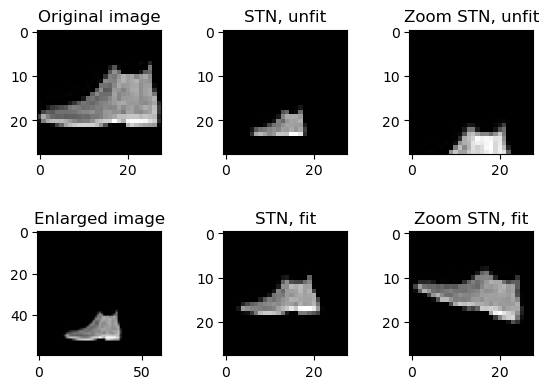

313/313 [==============================] - 2s 7ms/step - loss: 0.3257 - accuracy: 0.8809


In [55]:
plot()

stn_model.evaluate(x_test_mod, y_test)
stn_model_zoom.evaluate(x_test_mod, y_test);

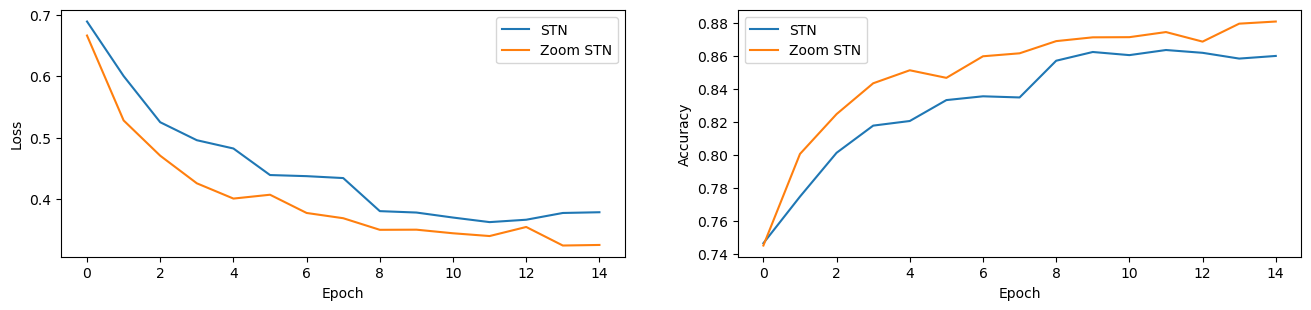

In [56]:
fig = plt.figure(figsize=plt.figaspect(0.1 * 2))

ax = fig.add_subplot(1, 2, 1)
ax.plot(hist.history['val_loss'], label='STN')
ax.plot(hist_zoom.history['val_loss'], label='Zoom STN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist.history['val_accuracy'], label='STN')
ax.plot(hist_zoom.history['val_accuracy'], label='Zoom STN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Important methods/models in computer vision

For those of you interested in diving deeper into computer vision, there are some essential papers which are important in and of themselves, important to understand further developments, and/or might serve as good "starting points".

1. ResNet: The concept of residual learning is one of the most important findings in neural network research, and the original paper is well-worth reading: https://openaccess.thecvf.com/content_cvpr_2016/html/He_Deep_Residual_Learning_CVPR_2016_paper.html. All SOTA methods rely on this research directly. It might be worth reading up on the VGG and Inception architecture, Highway Networks, and DenseNets to understand how we ended up with the current architecture we use. The same may be said of Wide ResNets and ResNeXt.
1. EffecientNet: An extremely influential architecture, found by performing efficient search over depth/width/resolution: https://arxiv.org/abs/1905.11946. You may want to read up on MobileNets V1-3 before reading this paper.
1. The augmentation we used so far was just something we selected more or less at random. Better methods exists: I suggest reading the RandAugment paper as a starting point: https://arxiv.org/abs/1909.13719.

## ResNET
- Is learning better networks as simple as stacking more layers? 

**Motivated by the following observation:**
- When deeper networks are able to start converging, a degradation problem has been exposed: with the network depth increasing, accuracy gets saturated (which might be
unsurprising) and then degrades rapidly. 
- Unexpectedly, such degradation is not caused by overfitting, and adding more layers to a suitably deep model leads to higher training error.

<img src="./graphics/ResNETfig1.PNG" alt="Drawing" style="width: 500px;"/>
<br></br>
<span style="font-size:12px">
    Source: "He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778)".
</span>

## Residual layers

**Maybe degradation is caused by solvers having difficulties in approximating identity mappings by multiple nonlinear layers!**

**Lets introduce a identity mapping (residual connection aka skipped connection)**

<img src="./graphics/resnet1.png" alt="Drawing" style="width: 1000px;"/>
<br></br>
<span style="font-size:12px">
    Source: "He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778)".
</span>

<img src="./graphics/resnet2.png" alt="Drawing" style="width: 200px;"/>
<br></br>
<span style="font-size:12px">
    Source: "He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778)".
</span>

<img src="./graphics/ResNETfig4.png" alt="Drawing" style="width: 1300px;"/>
<br></br>
<span style="font-size:14px">
    Source: "He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778)".
</span>

##  Bottleneck layers

Residual layers are flexible. For large models they can be used in "combination" with bottleneck layers (layers that reduced the dimensions of the network substantially)

<img src="./graphics/ResNETfig5.png" alt="Drawing" style="width: 1000px;"/>
<br></br>
<span style="font-size:14px">
    Source: "He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778)".
</span>

<img src="./graphics/ResNETfig6.png" alt="Drawing" style="hight: 1000px;"/>

<span style="font-size:14px">
    Source: "He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778)".
</span>

## A simplified way of making a residual layer

See https://www.tensorflow.org/tutorials/customization/custom_layers for a more detailed illustration.

In [57]:
import tensorflow as tf

def create_res_layer(x,name:str): # try to change this to the implementation in the ResNet paper!
    nonlinear_part = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    return tf.keras.layers.Add(name=name)([x, nonlinear_part])

input_layer = tf.keras.layers.Input((32, 32, 3))
x = tf.keras.layers.Conv2D(32, (5, 5), activation='relu')(input_layer)

for i in range(2):
    x = create_res_layer(x,name = f'skip_layer_{i}')

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

In [58]:
model = tf.keras.models.Model(inputs=input_layer, outputs=x)
model.summary()

Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_20 (Conv2D)             (None, 28, 28, 32)   2432        ['input_6[0][0]']                
                                                                                                  
 conv2d_21 (Conv2D)             (None, 28, 28, 32)   9248        ['conv2d_20[0][0]']              
                                                                                                  
 skip_layer_0 (Add)             (None, 28, 28, 32)   0           ['conv2d_20[0][0]',              
                                                                  'conv2d_21[0][0]']       

## EfficientNet

I have been asked many times on what the best width and depth of neural networks are, and on how important these matters are.

EfficientNet shows that they *do* matter. The paper really is all about finding the optimal balance, as we do when we optimize the parameters of out networks.

Further, it shows that you may develop efficient rules for "scaling up" your networks. This is related to an important point when optimizing your models - it may be worth to start with a relatively small model as you do your initial experiments, and then to scale up to a larger model only later - and do so in a "sensible" way.

## EfficientNet

<img src="./graphics/EfficientNETfig2.PNG" alt="Drawing" style="width: 1500px;"/>

<span style="font-size:14px">
    Source: "Tan, M., & Le, Q. V. (2019). Efficientnet: Rethinking model scaling for convolutional neural networks. arXiv preprint arXiv:1905.11946".
</span>


## EfficientNet

<img src="./graphics/EffNetFig3.PNG" alt="Drawing" style="width: 1200px;"/>

FLOPS: FLoating point Operations Per Second

<span style="font-size:14px">
    Source: "Tan, M., & Le, Q. V. (2019). Efficientnet: Rethinking model scaling for convolutional neural networks. arXiv preprint arXiv:1905.11946".
</span>


## EfficientNet

<img src="./graphics/EfficientNETfig4.PNG" alt="Drawing" style="width: 400px;"/>
<br></br>
<span style="font-size:12px">
    Source: "Tan, M., & Le, Q. V. (2019). Efficientnet: Rethinking model scaling for convolutional neural networks. arXiv preprint arXiv:1905.11946".
</span>

## EfficientNet
<img src="./graphics/EffNetEQ2.PNG" alt="Drawing" style="width: 600px;"/>

with **compound scaling**:

<img src="./graphics/EffNetEQ3.PNG" alt="Drawing" style="width: 600px;"/>
<br></br>
<span style="font-size:14px">
    Source: "Tan, M., & Le, Q. V. (2019). Efficientnet: Rethinking model scaling for convolutional neural networks. arXiv preprint arXiv:1905.11946".
</span>

## EfficientNet

<img src="./graphics/EfficientNetTable1.JPG" alt="Drawing" style="width: 1000px;"/>
<br></br>
<span style="font-size:14px">
    Source: "Tan, M., & Le, Q. V. (2019). Efficientnet: Rethinking model scaling for convolutional neural networks. arXiv preprint arXiv:1905.11946".
</span>

# EfficientNet

<img src="./graphics/EffNetCompoundScaling.PNG" alt="Drawing" style="width: 1000px;"/>

## EfficientNet

<img src="./graphics/eff-netfig1.PNG" alt="Drawing" style="width: 400px;"/>

## EfficientNet

<img src="./graphics/EfficientNETTable3.PNG" alt="Drawing" style="width: 600px;"/>
<br></br>
<span style="font-size:12px">
    Source: "Tan, M., & Le, Q. V. (2019). Efficientnet: Rethinking model scaling for convolutional neural networks. arXiv preprint arXiv:1905.11946".
</span>

## EfficientNet

<img src="./graphics/EfficientNETfig7.PNG" alt="Drawing" style="width: 1200px;"/>
<br></br>
<span style="font-size:14px">
    Source: "Tan, M., & Le, Q. V. (2019). Efficientnet: Rethinking model scaling for convolutional neural networks. arXiv preprint arXiv:1905.11946".
</span>

## Exercise

Use the CIFAR-10 data with images padded onto a 60x60 mask (the code for this is available in the notebook for this exercise) to solve this exercise.

1. Build a CNN to solve the task *using the functional API*. Note that the images are relatively large now (compared to the slides), so you may want to apply an additional pooling layer for downscaling.
1. Build a spatial transformer network to solve the task (you need to use the functional API to some extent; see the slides). Consider using default zoom for a good prior (i.e. ca. 50% "zoom"). Preferably this should have roughly the same number of parameters as your model in **1.**. Is it better?
1. Visualize some of the images after your spatial transformer transforms them. Are they transformed in a sensible way?

**Note**: Be sure to place the layers.py file in the same folder as this file to import the BilinearInterpolation layer.

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point (exercise-functional-api.ipynb). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

## Advantages and disadvantages of CNNs

Advantages:
1. CNNs are extremely efficient at processing images$^1$, making efficient use of "parameter sharing", by recognizing that different locations of an image may be analyzed the same fundamental way. This has positive implications for speed and generalization (as such reducing overfitting). Current SOTA in computer vision relies entirely on CNNs.
1. CNNs allow us to more easily understand the "black box of neural networks" - both by imposing strong priors, such as when using pooling layers or spatial transformers, and by looking at visualizations of activations, filters, and class activation maps.

Disadvantages:
1. Forcing these strong priors may not be optimal. Although it has proved to work very well, being crucial for current SOTA, some as-of-yet unpublished research shows that CNNs are *not* in fact crucial for computer vision; see https://openreview.net/pdf?id=YicbFdNTTy.

$^1$convolutions are also useful for various other types of data, such as text and videos.

## Summary and looking ahead

In these lecture, we dived deep into the world of computer vision, covering in detail CNNs, including their structure and use, how we may seek to understand how they work, how to use strong priors to improve their performance, and what current SOTA looks like. Further, we discussed data augmentation (in the context of *image* augmentation).

Great! What's next?

We'll move on to recurrent neural networks, particularly focusing on natural language processing, such as how to understand and even generate text.